<a href="https://colab.research.google.com/github/Ranjita2022/Dental-Cavity-Detection-Using-Instance-Segmentation-and-Object-detection/blob/main/yolov8_is.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri Dec 20 18:27:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

In [ ]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="R3t7omvdpJehs1dto26f")
project = rf.workspace("ranjita-oo6g4").project("instance-segmentation-vlhgf")
version = project.version(2)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Instance-Segmentation-2 in yolov8:: 100%|██████████| 5002/5002 [00:00<00:00, 5285.18it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data=/content/datasets/Instance-Segmentation-2/data.yaml epochs=15 imgsz=640

/content
New https://pypi.org/project/ultralytics/8.3.52 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Instance-Segmentation-2/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

/content


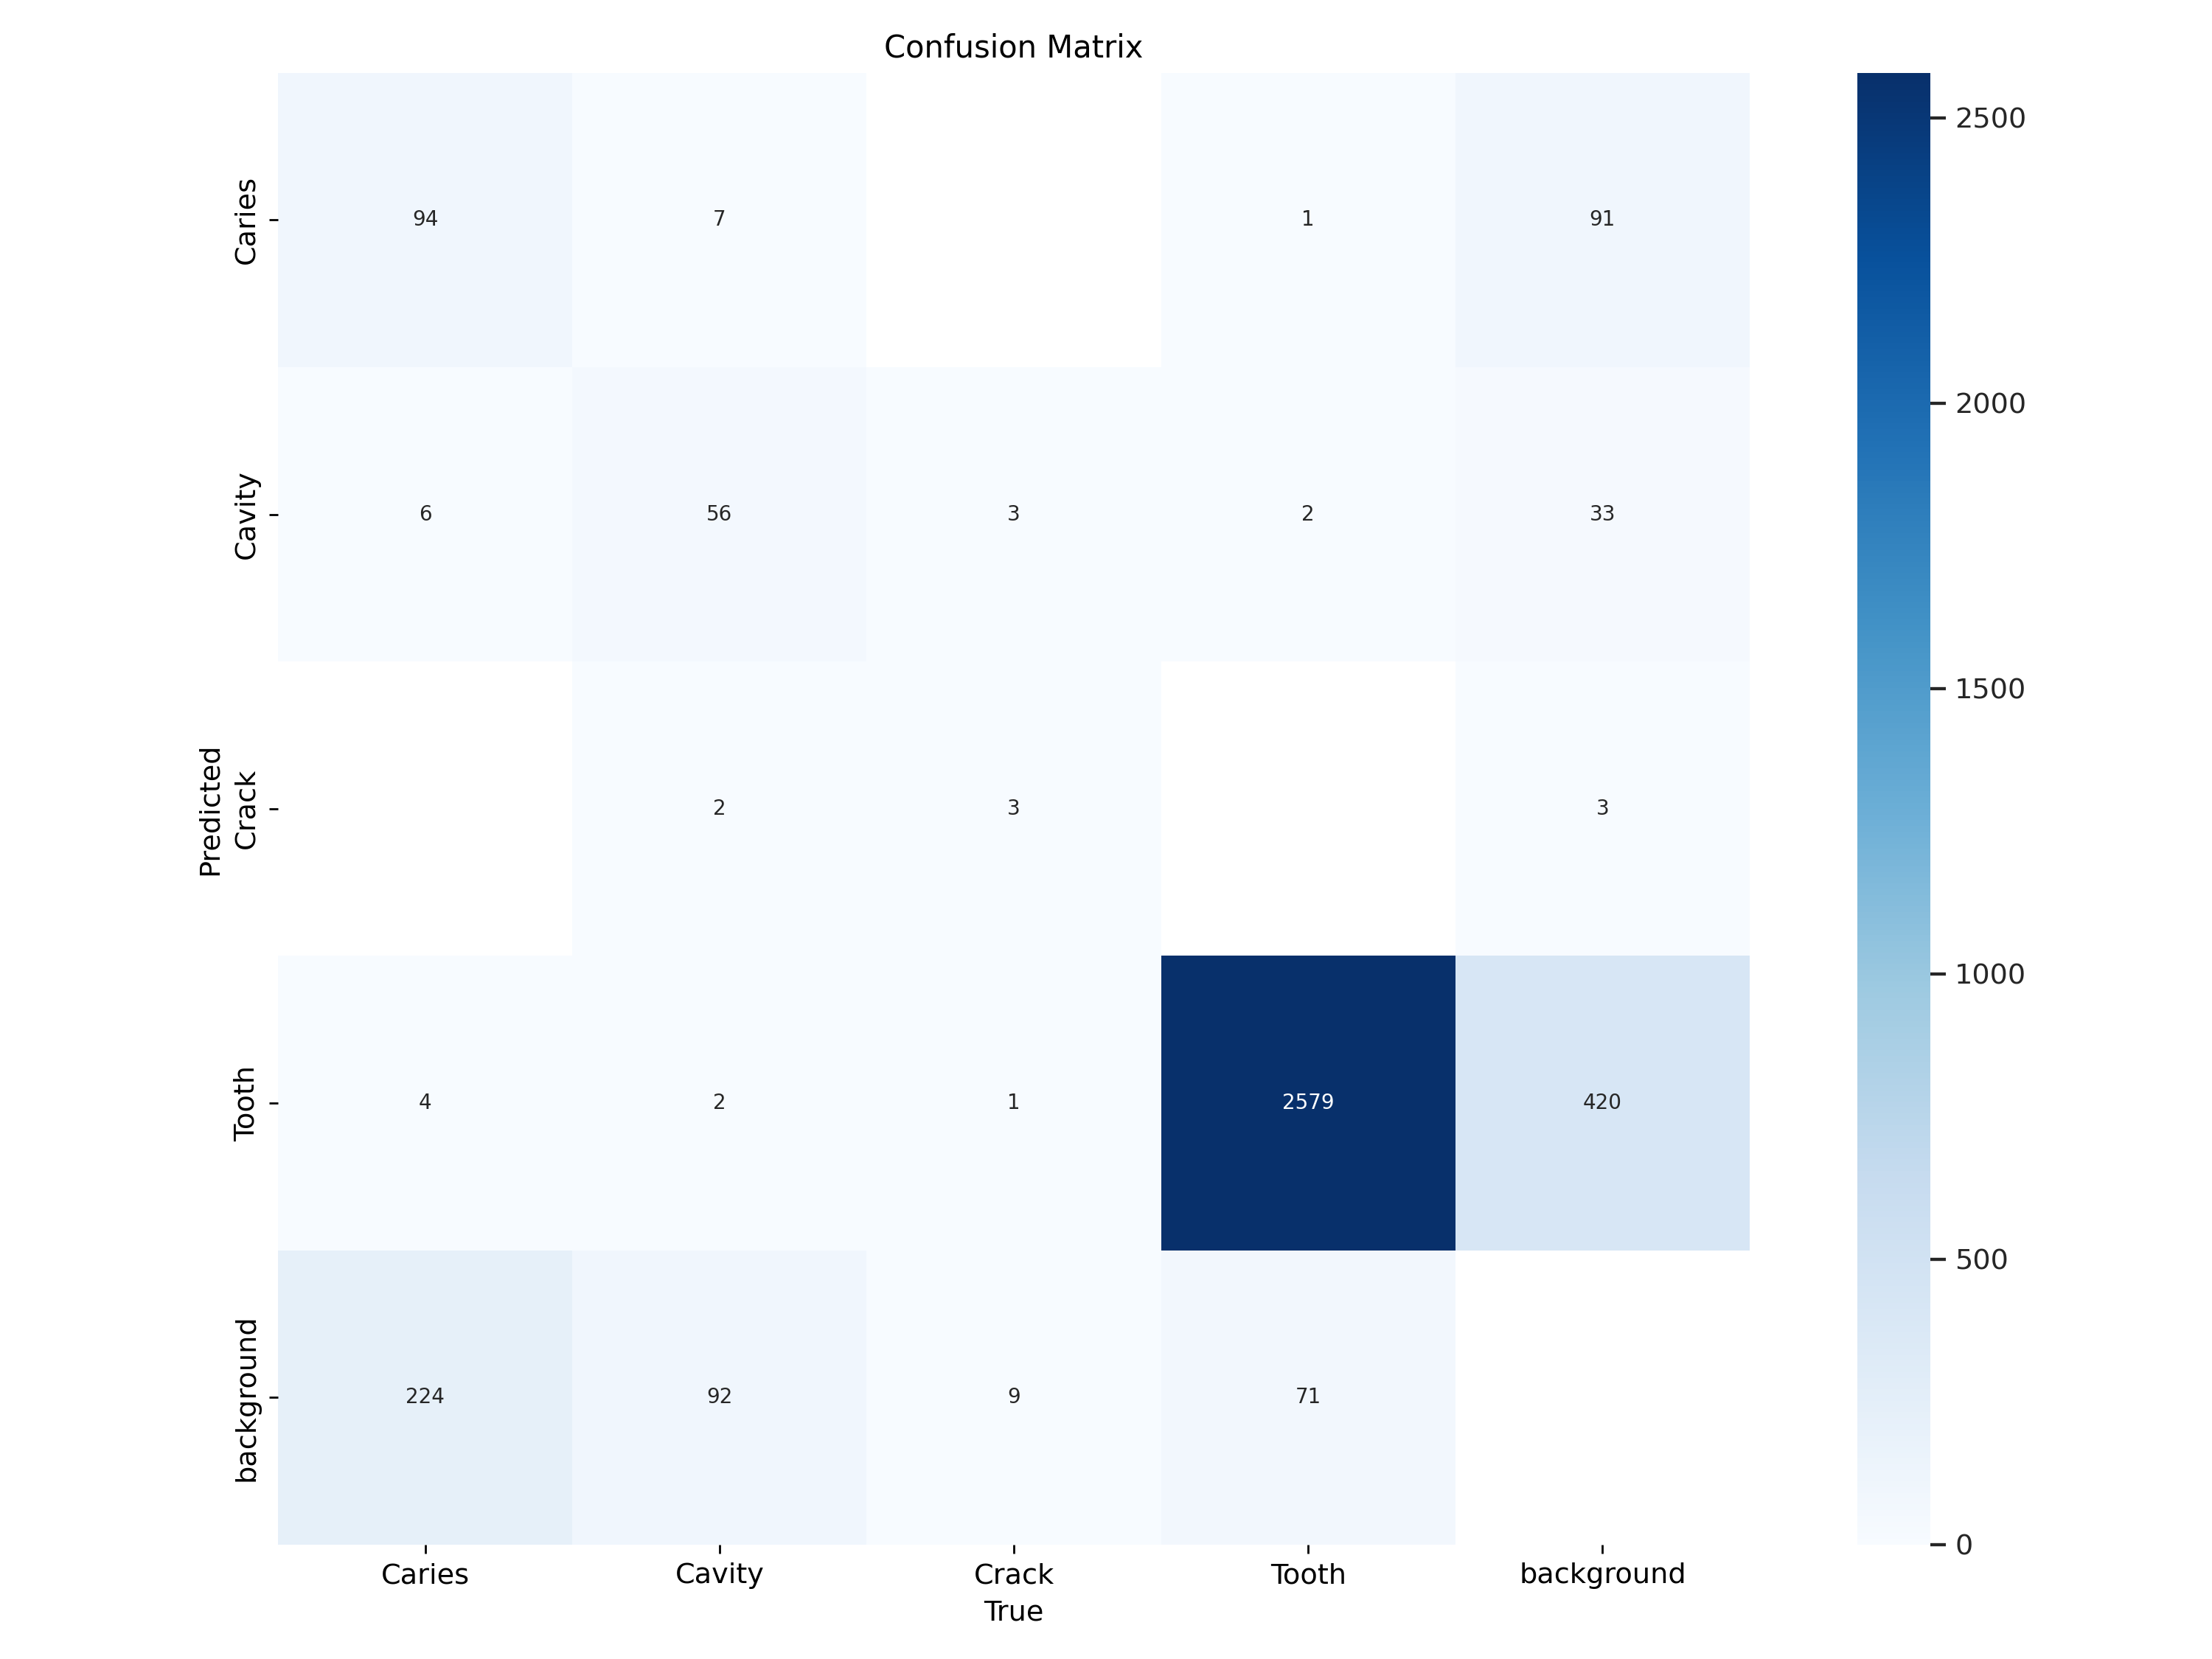

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=1000)

/content


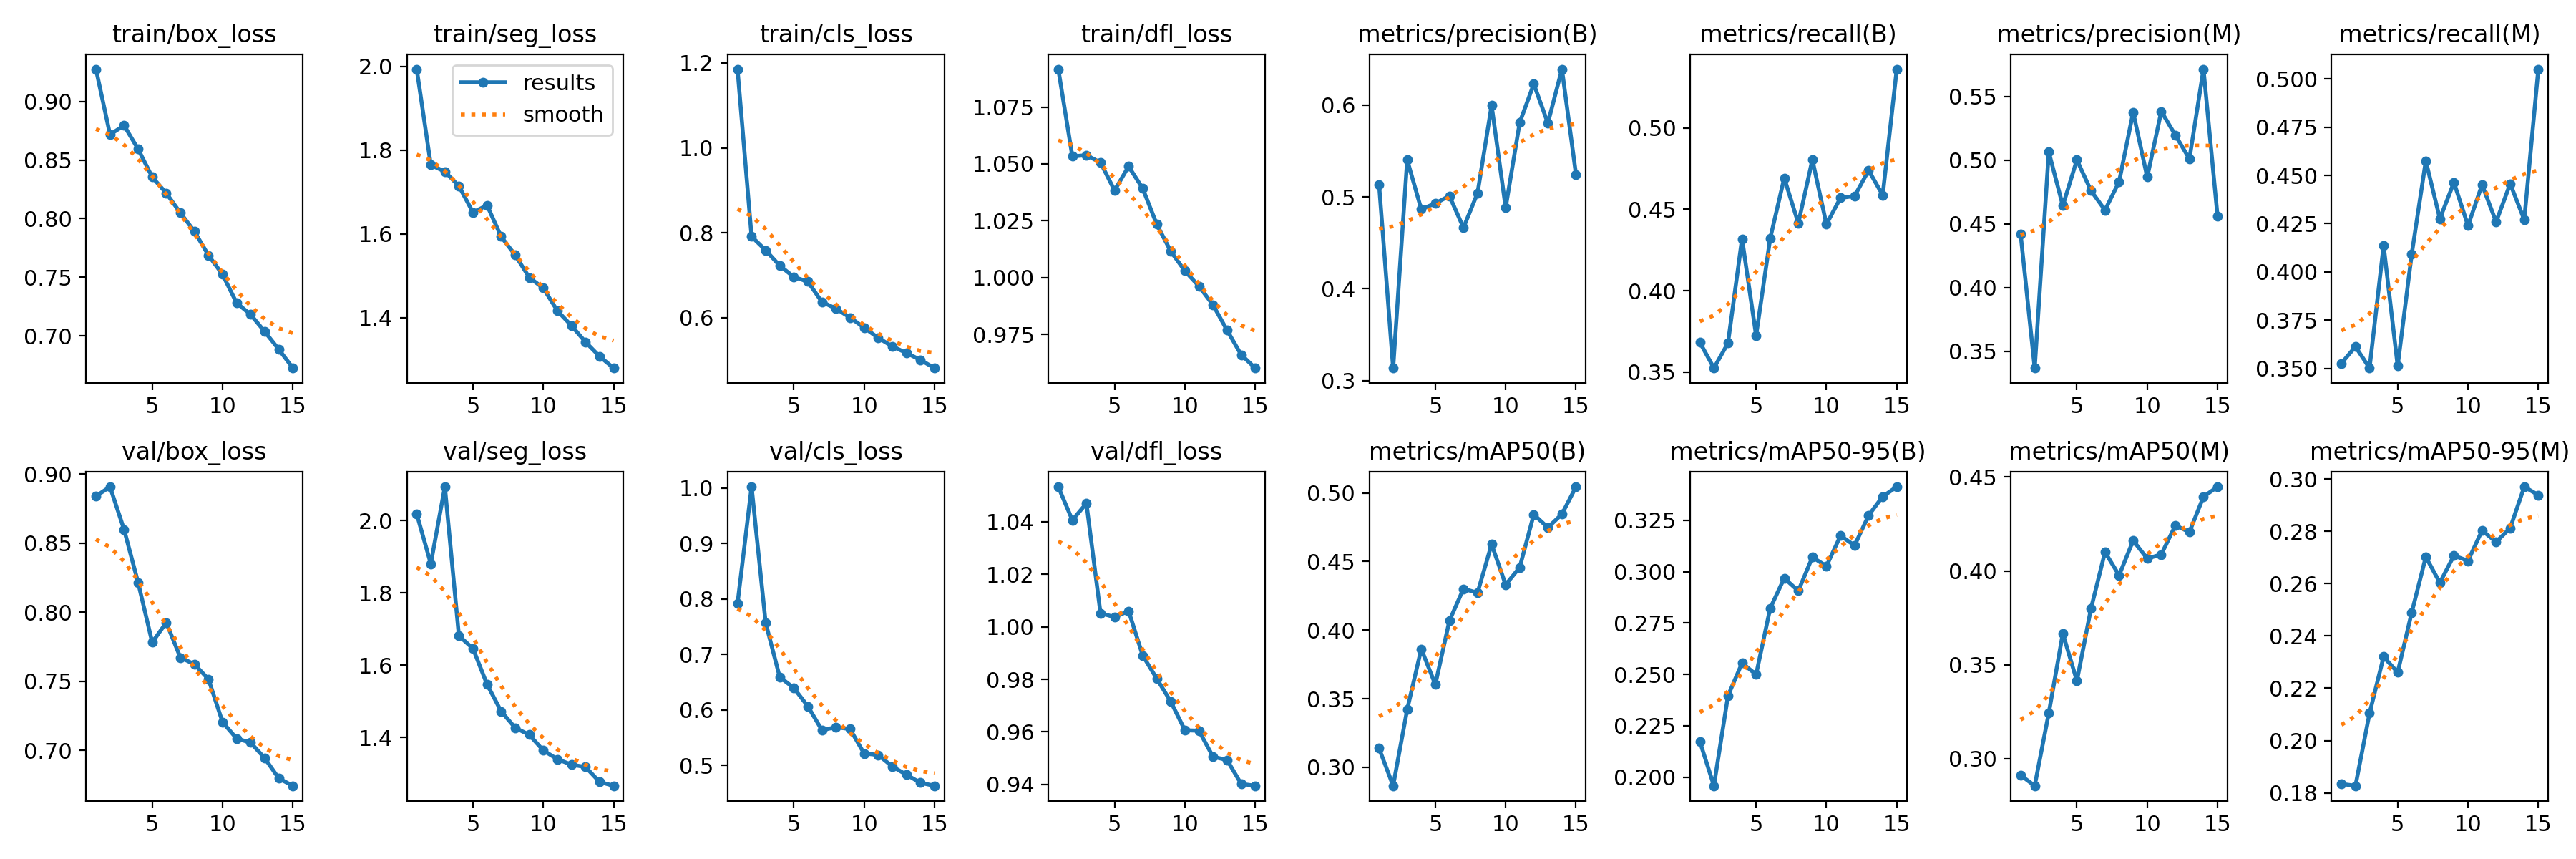

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/results.png', width=1000)

/content


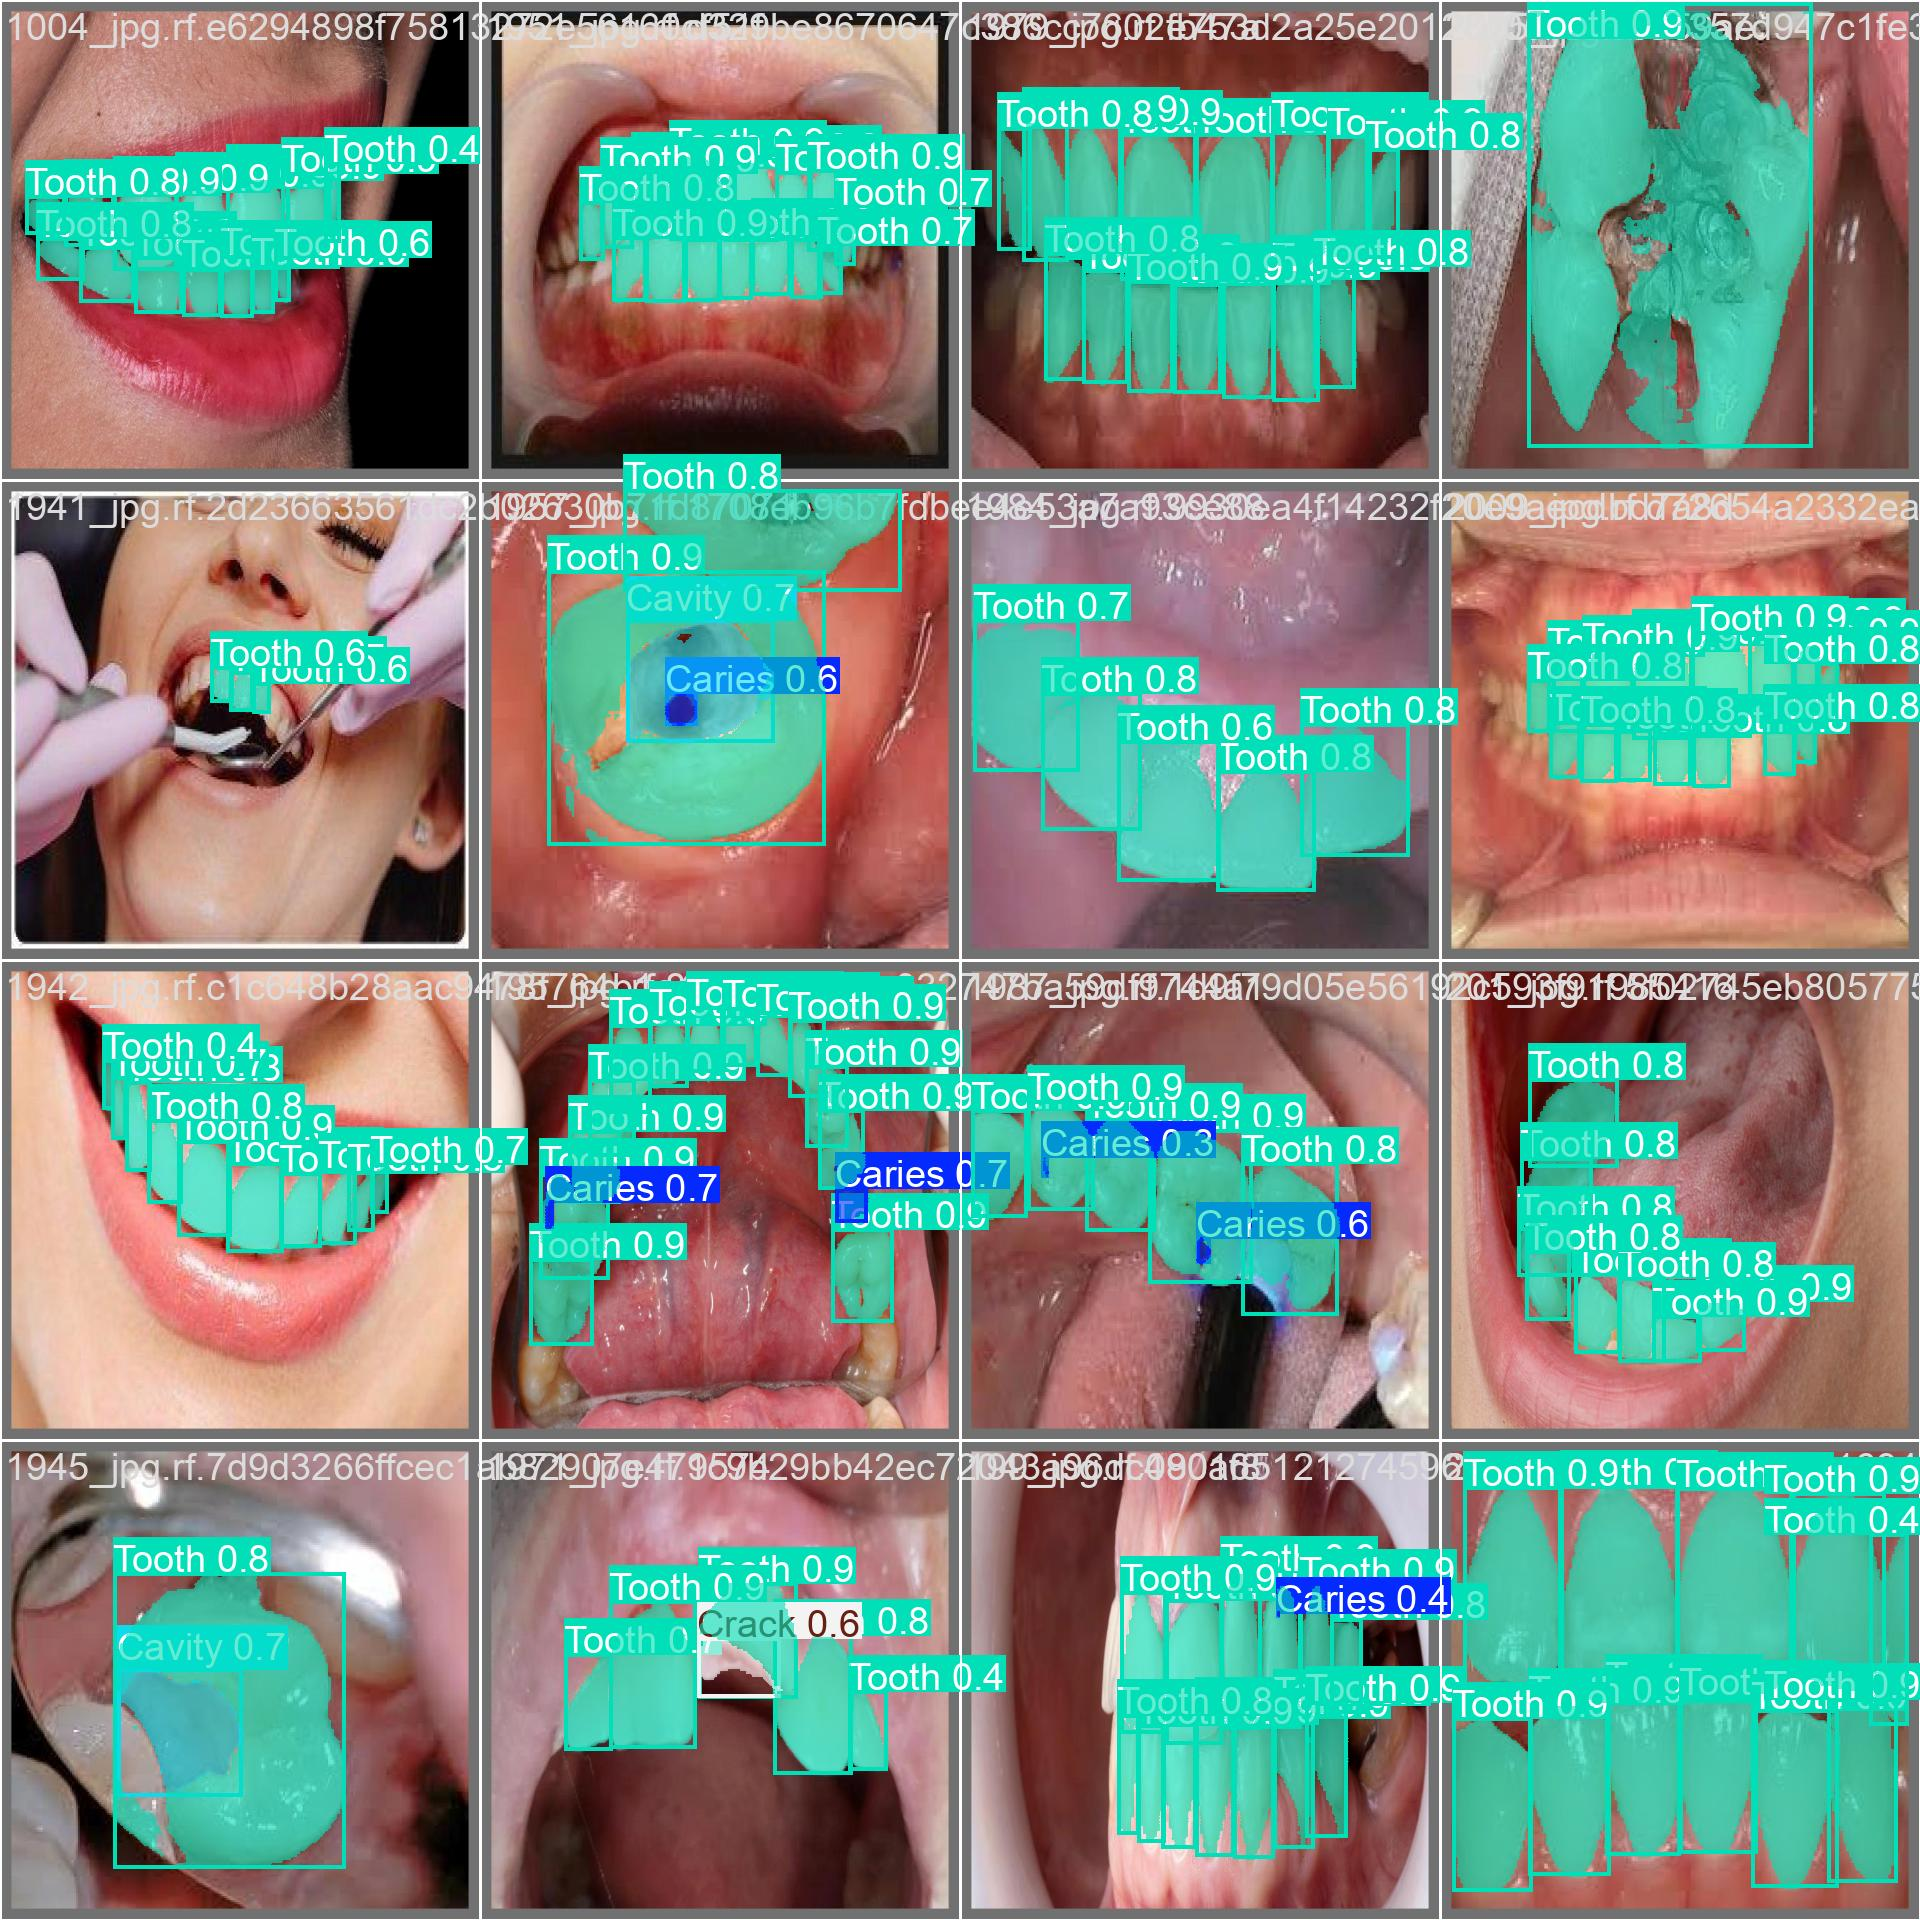

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/val_batch0_pred.jpg', width=1000)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train2/weights/best.pt data=/content/datasets/Instance-Segmentation-2/data.yaml


/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,781,148 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/Instance-Segmentation-2/valid/labels.cache... 254 images, 0 backgrounds, 0 corrupt: 100% 254/254 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 16/16 [00:08<00:00,  1.84it/s]
                   all        254       3156      0.524      0.536      0.504      0.344      0.455      0.503      0.441      0.292
                Caries        102        328      0.418      0.366      0.311      0.139      0.362      0.354      0.277      0.102
                Cavity         85        159      0.474      0.421      0.413      0.211      0.367      0.371      0.302      0.138
                 Crack         12         16      0.375      0.375      0.318      0.177      0.276

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train2/weights/best.pt conf=0.25 source=/content/datasets/Instance-Segmentation-2/test/images save=true

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,781,148 parameters, 0 gradients, 42.4 GFLOPs

image 1/250 /content/datasets/Instance-Segmentation-2/test/images/1012_jpg.rf.f9755406bf46df3e41d38a1394fccce6.jpg: 640x640 18 Cariess, 4 Tooths, 20.8ms
image 2/250 /content/datasets/Instance-Segmentation-2/test/images/103_jpg.rf.1c27afe9e52bf2f65ef52ee46c95bbdd.jpg: 640x640 16 Tooths, 20.9ms
image 3/250 /content/datasets/Instance-Segmentation-2/test/images/1047_jpg.rf.f21bd50b6c1dc2b24fb64480928e7494.jpg: 640x640 1 Cavity, 1 Tooth, 20.9ms
image 4/250 /content/datasets/Instance-Segmentation-2/test/images/1048_jpg.rf.3284d2c132746053150e521a4c66d6c5.jpg: 640x640 5 Cariess, 7 Tooths, 20.9ms
image 5/250 /content/datasets/Instance-Segmentation-2/test/images/1052_jpg.rf.4617282b58ff43450c729d6840934d78.jpg: 640x640 2 Cariess, 1 Cavity, 4 Tooths, 20.8ms
image 6/250 /content/datasets/Instance-Segmentation-2/t

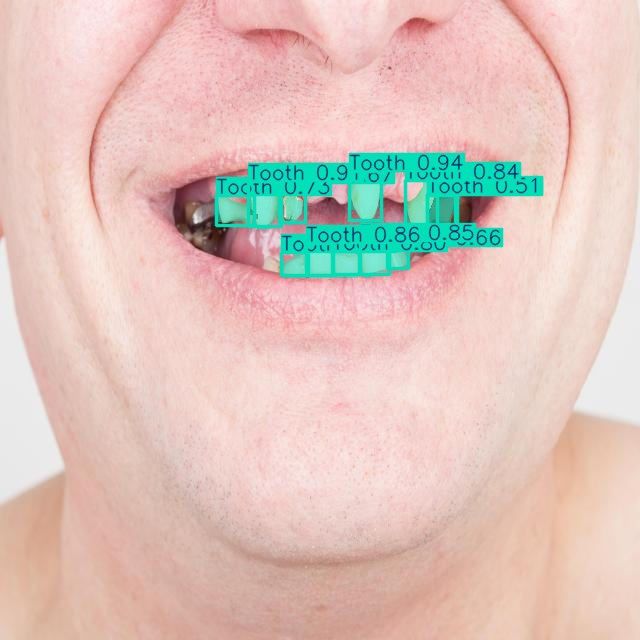

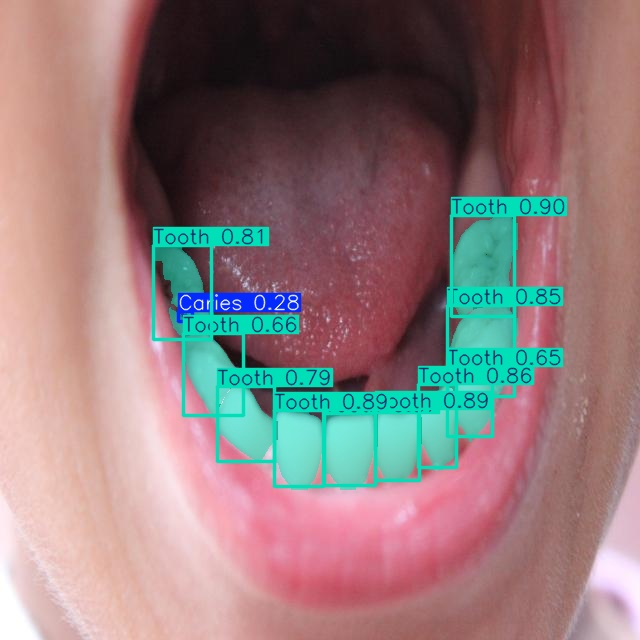

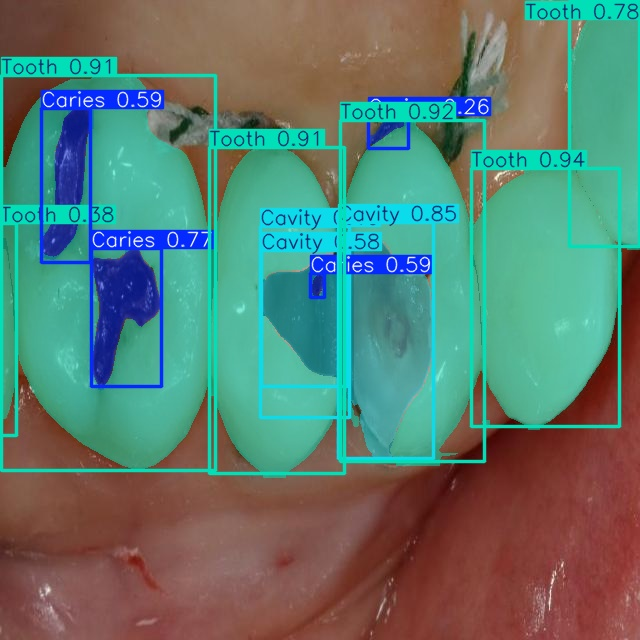

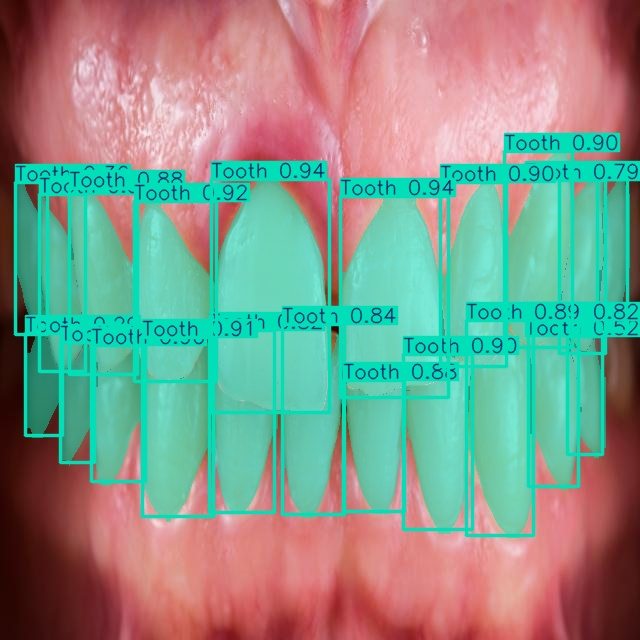

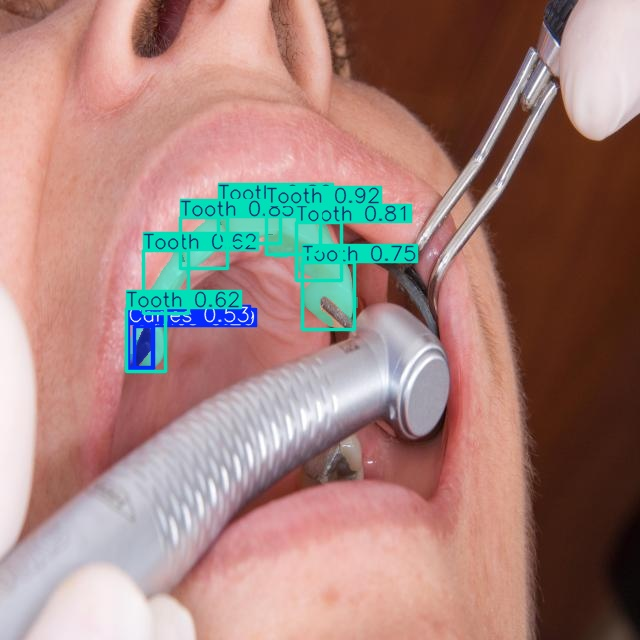

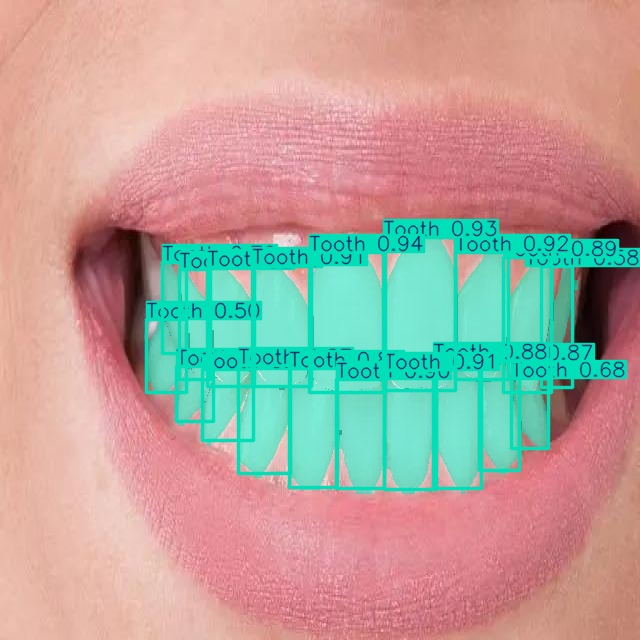

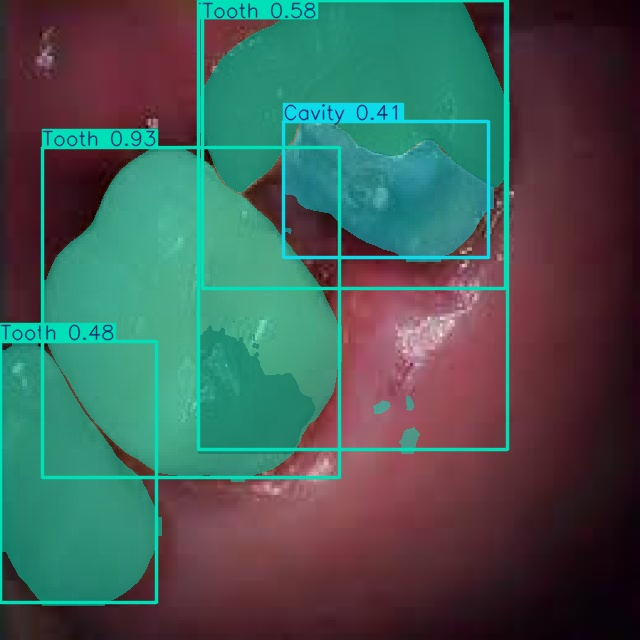

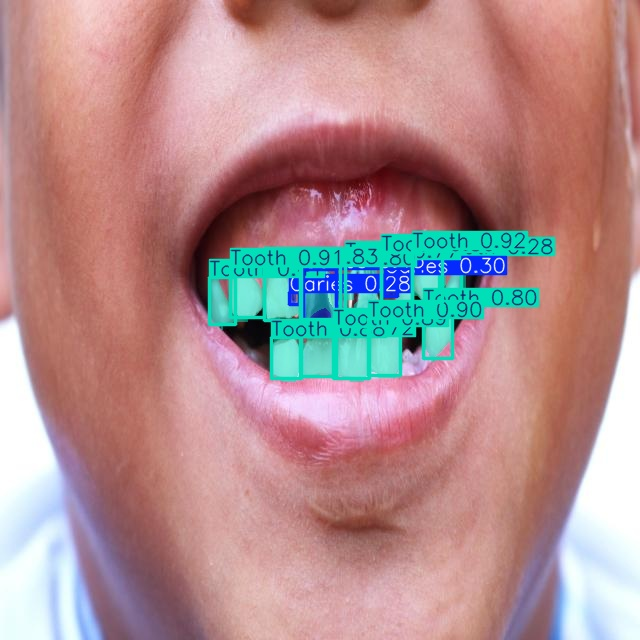

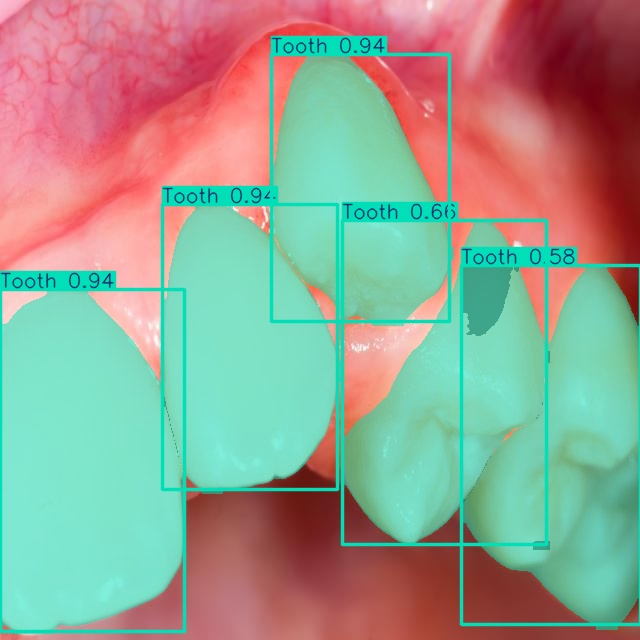

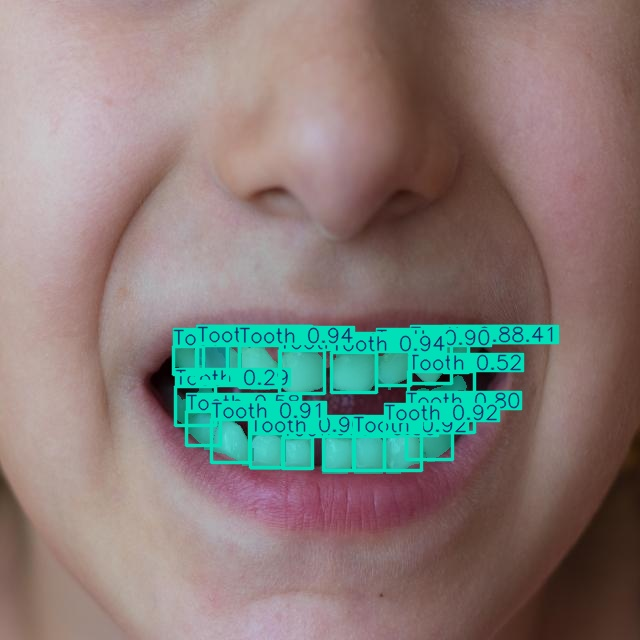

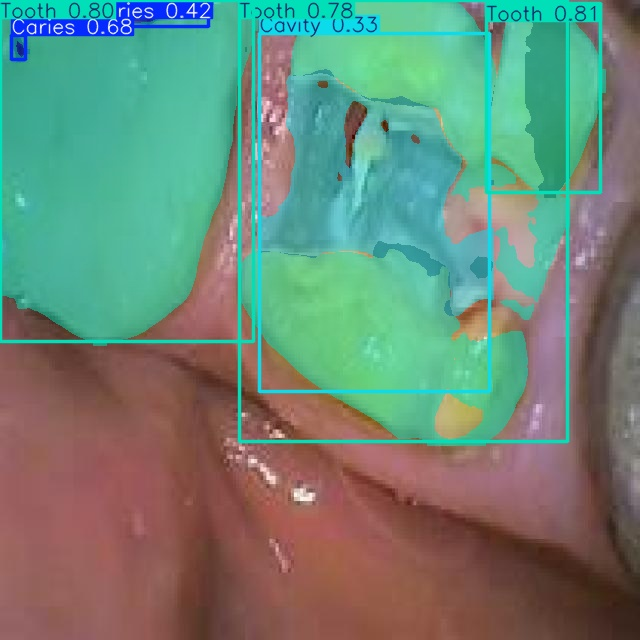

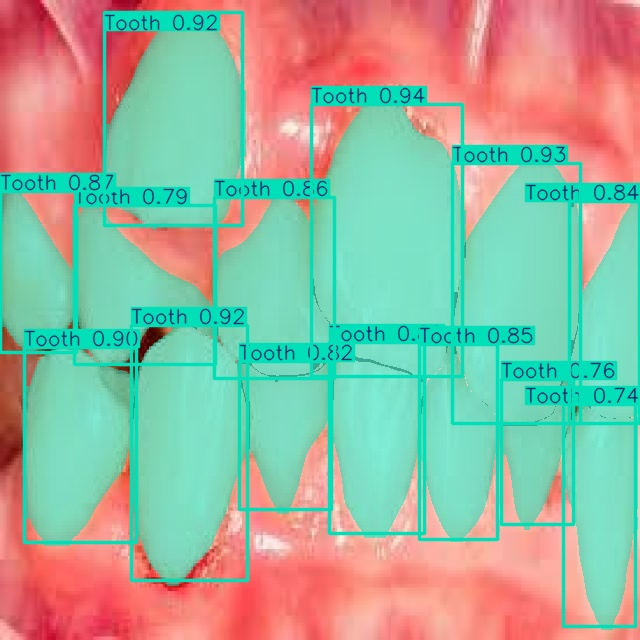

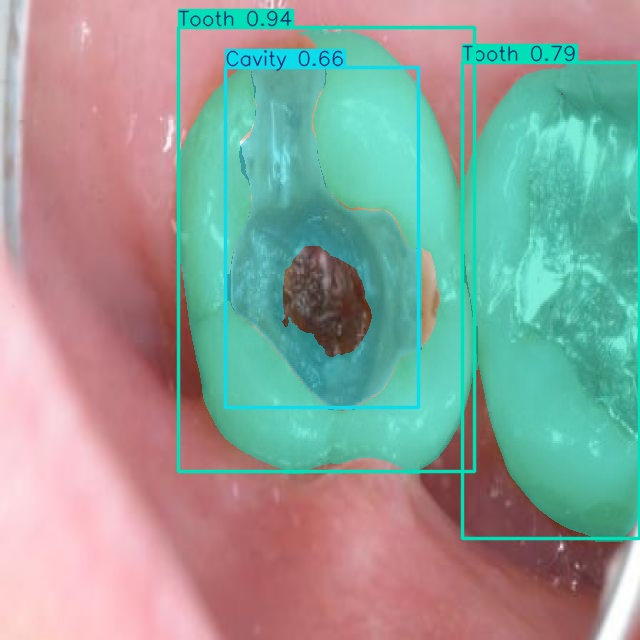

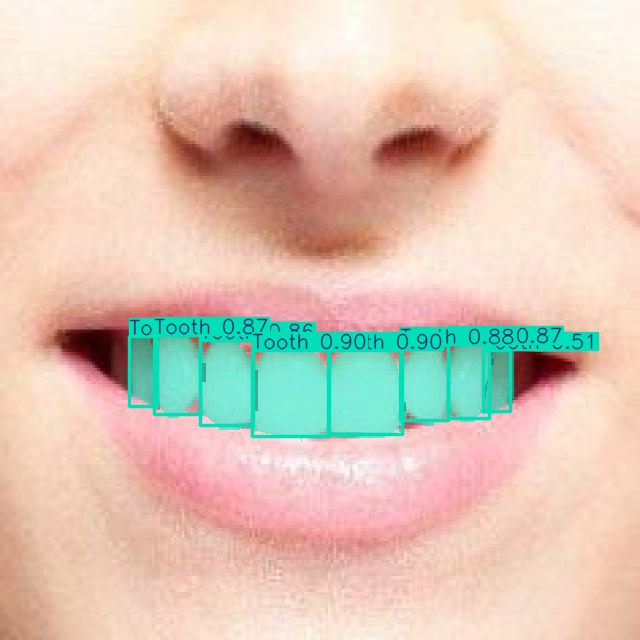

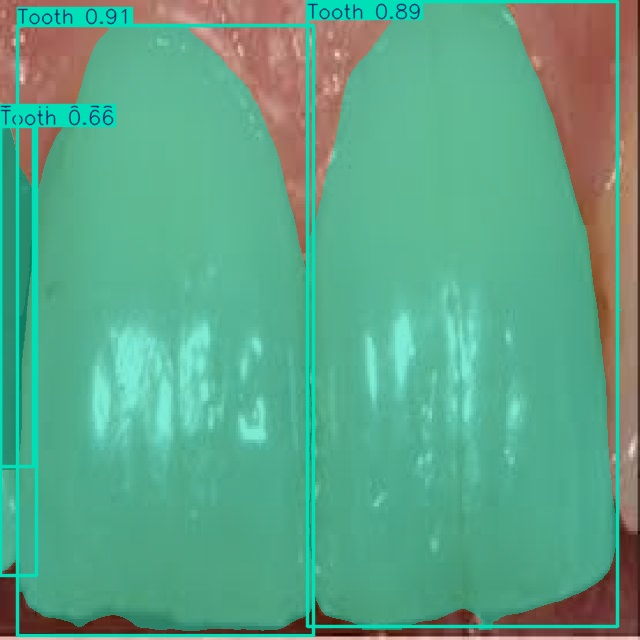

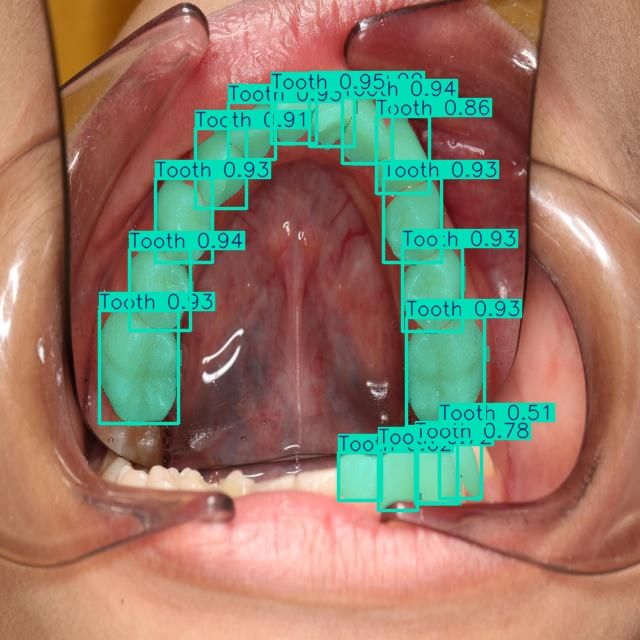

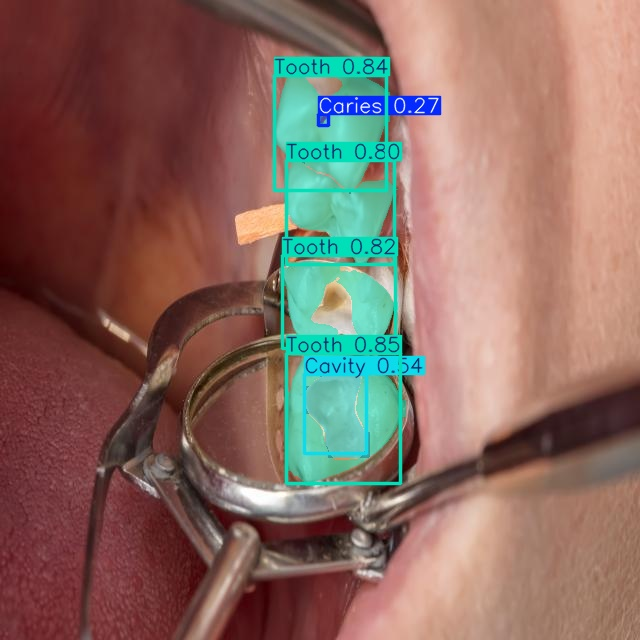

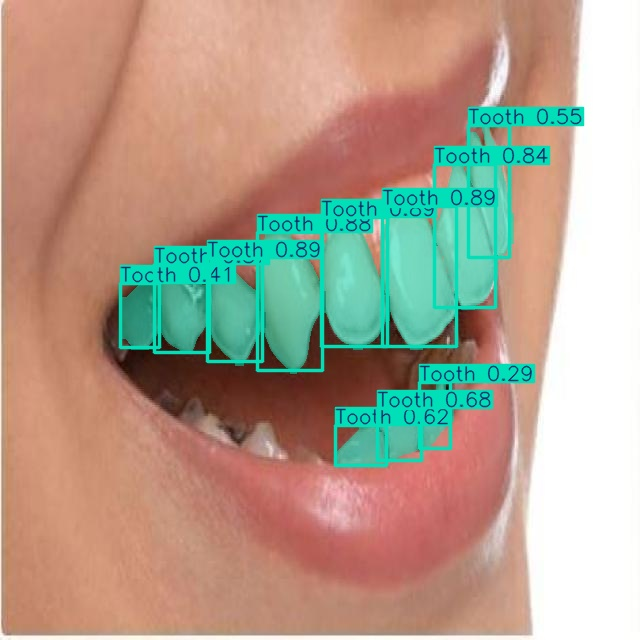

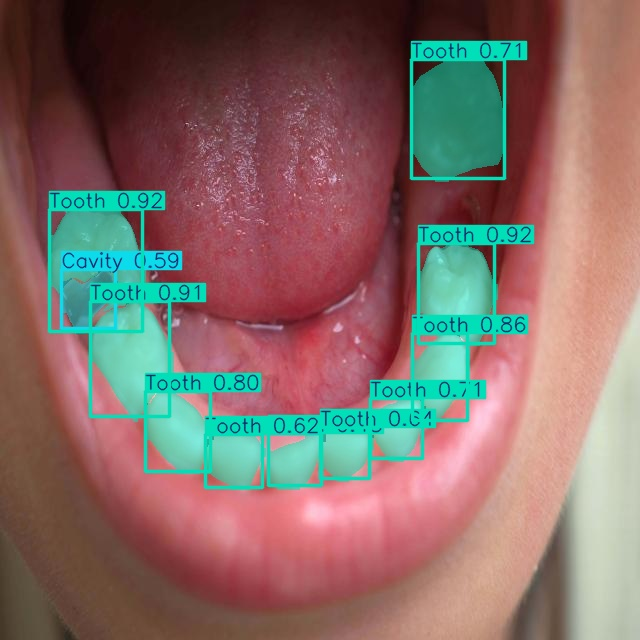

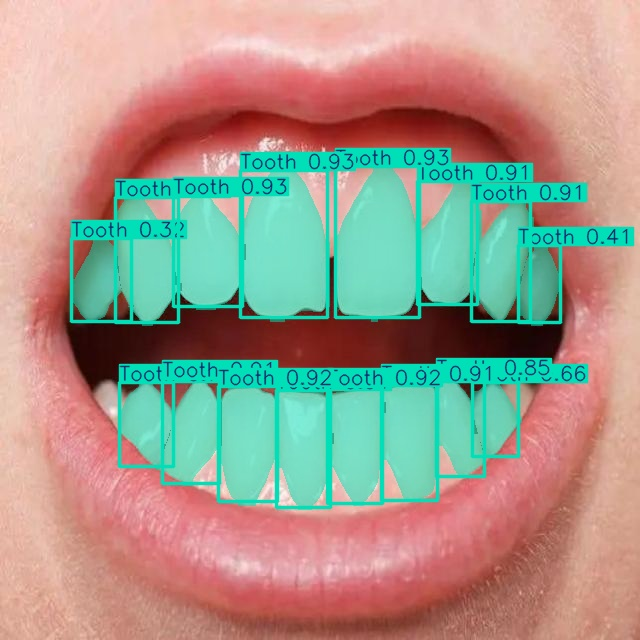

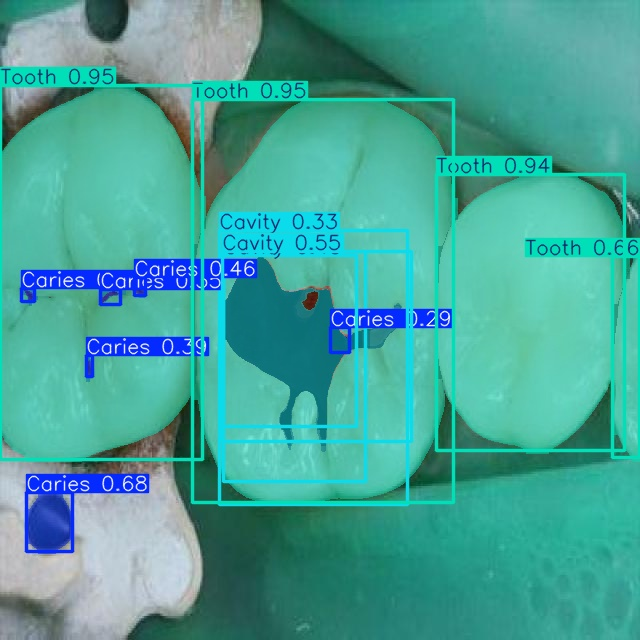

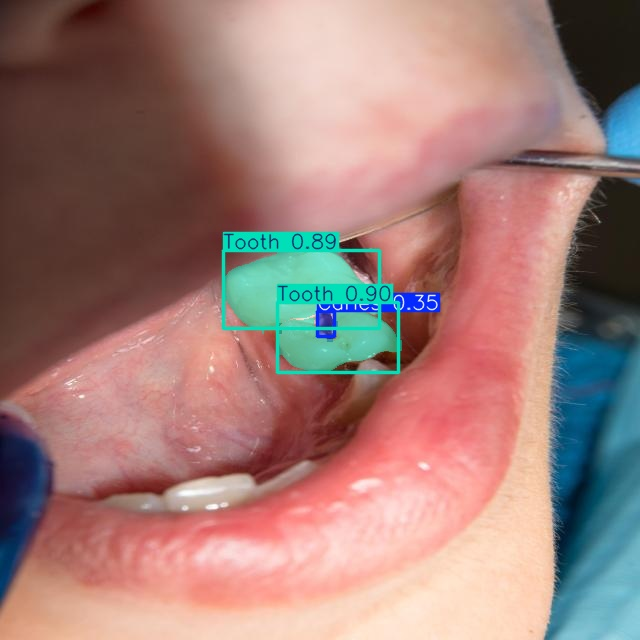

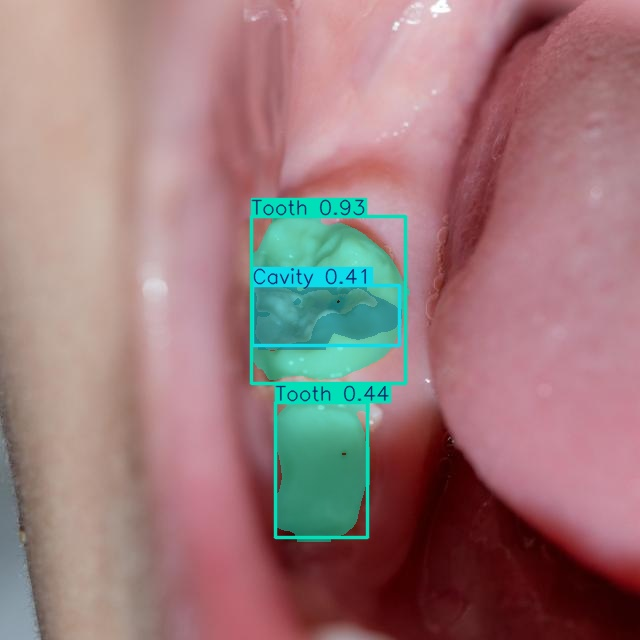

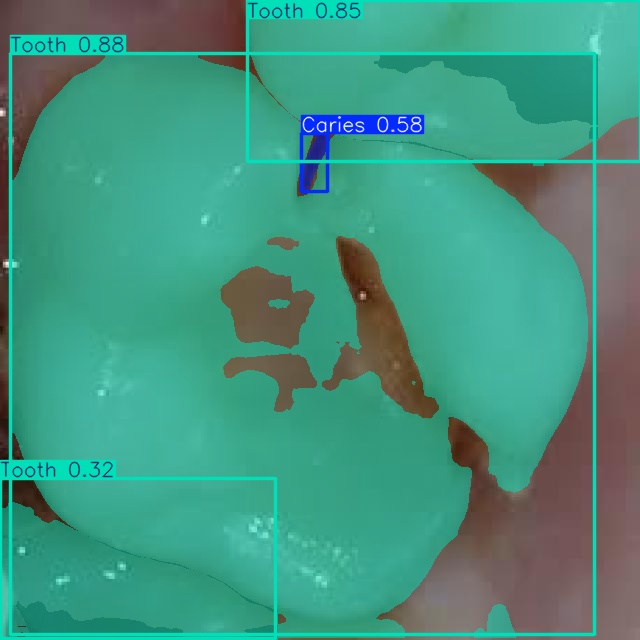

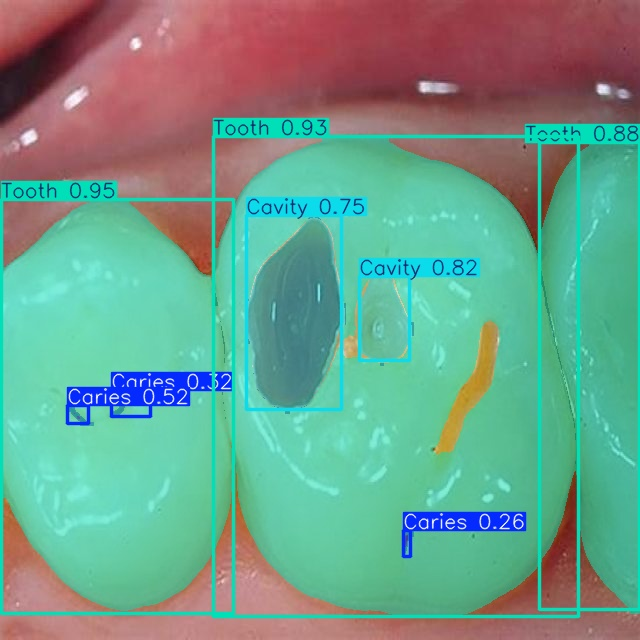

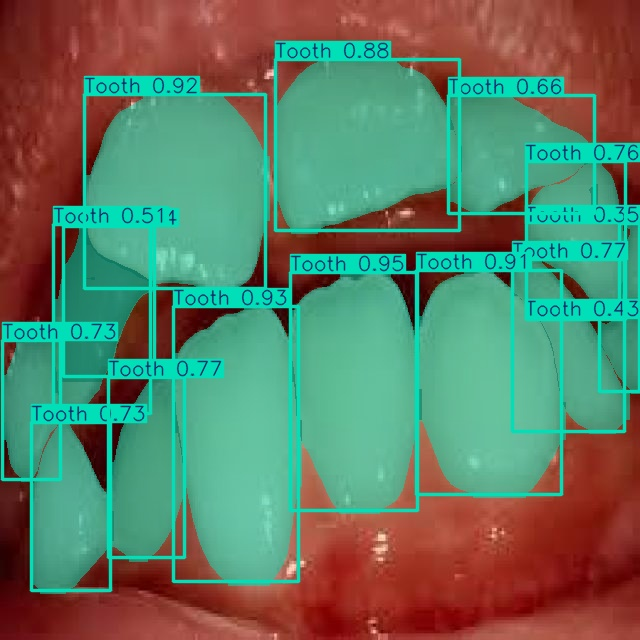

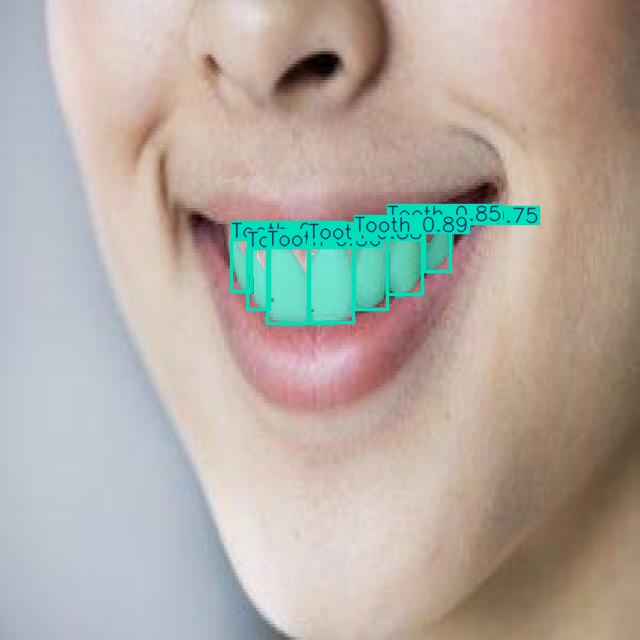

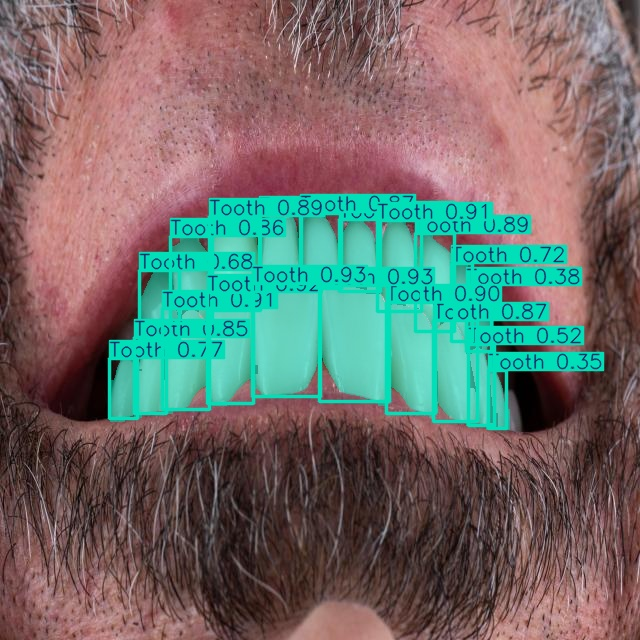

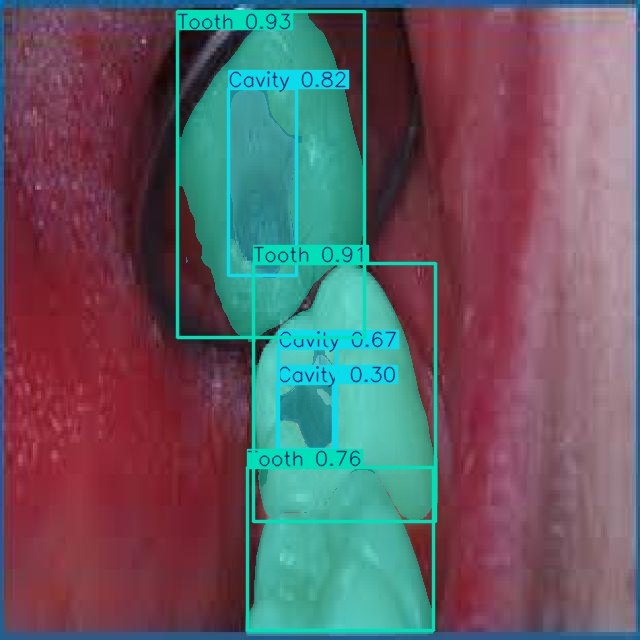

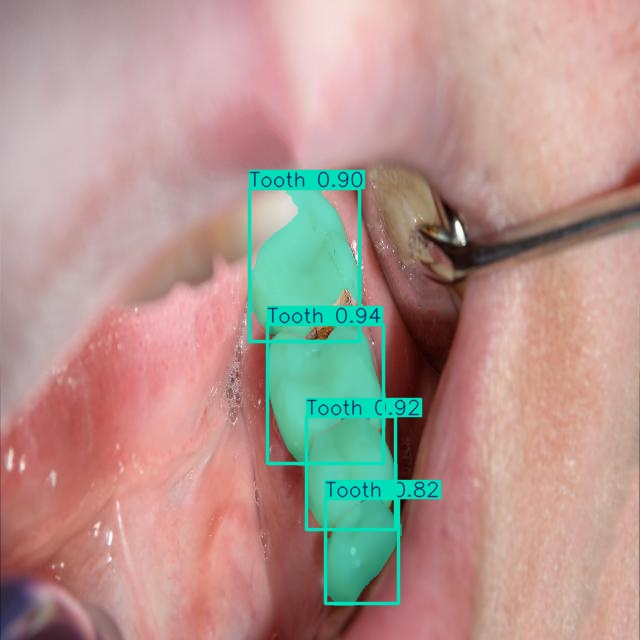

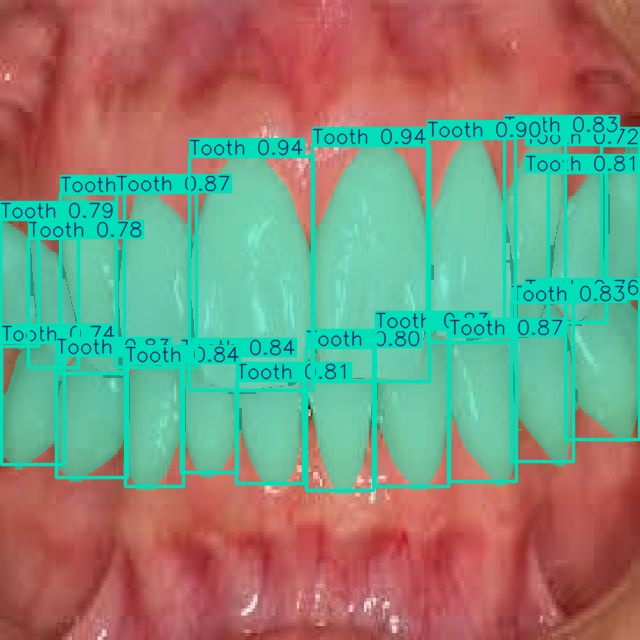

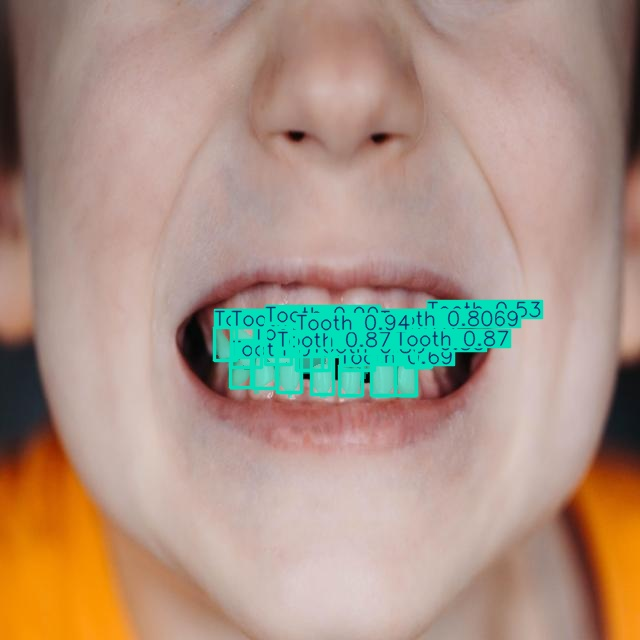

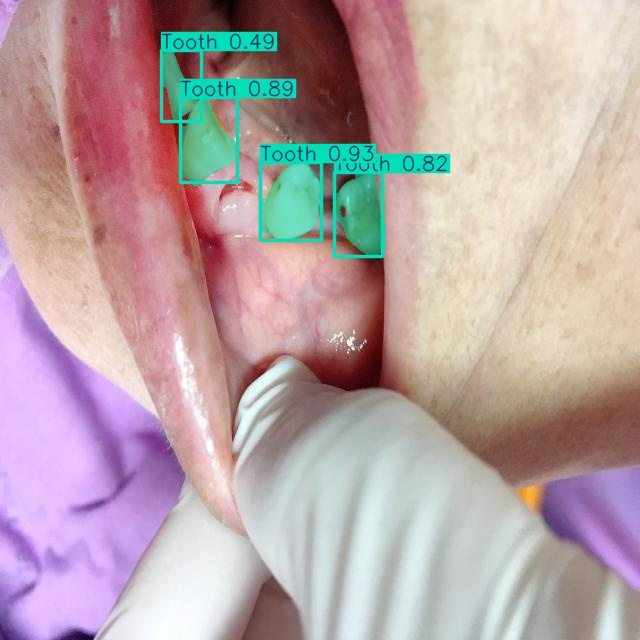

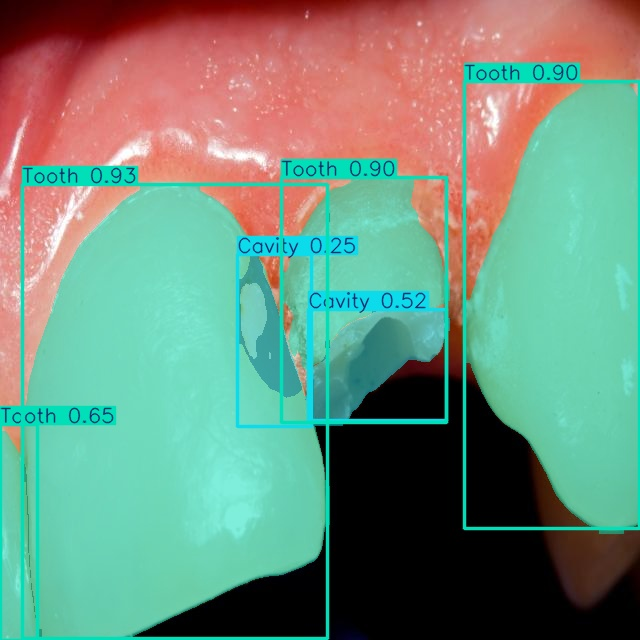

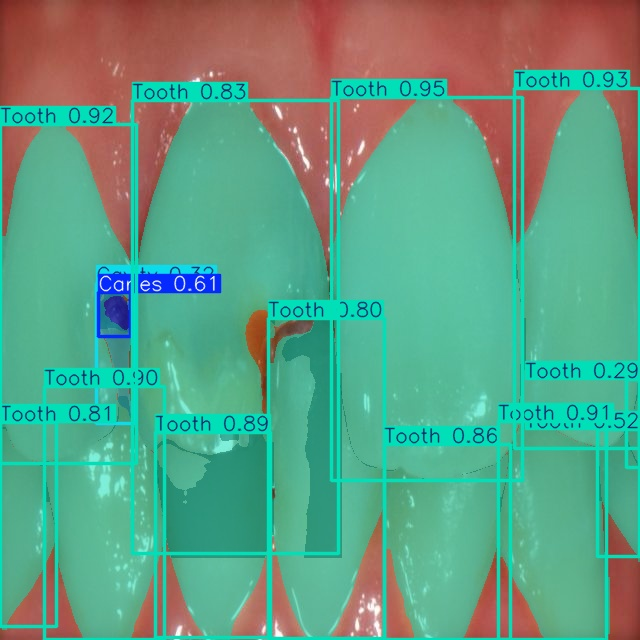

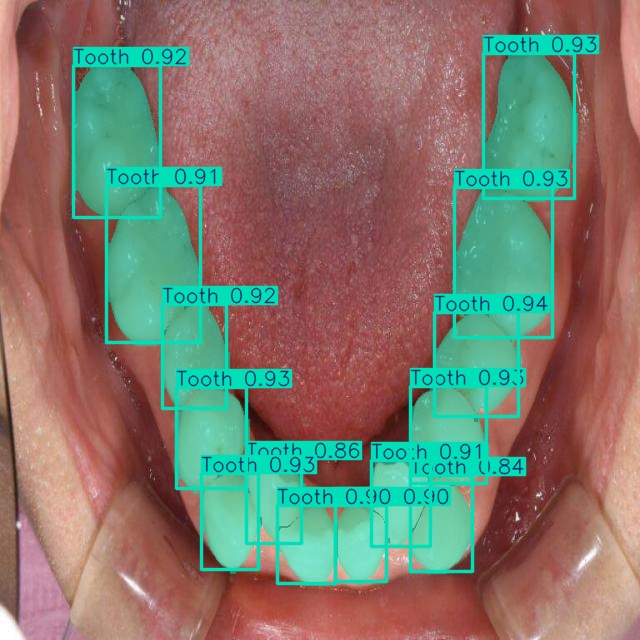

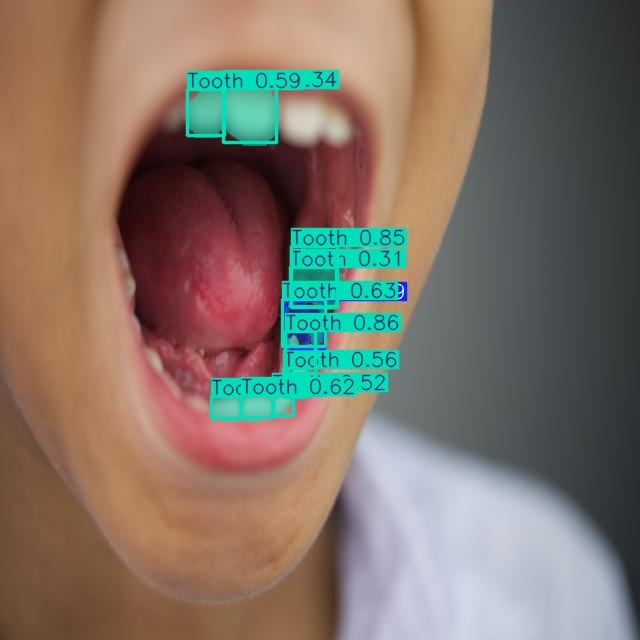

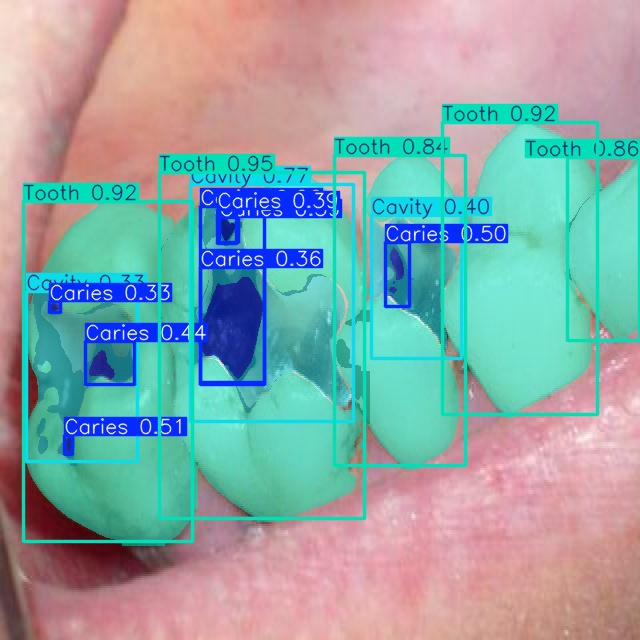

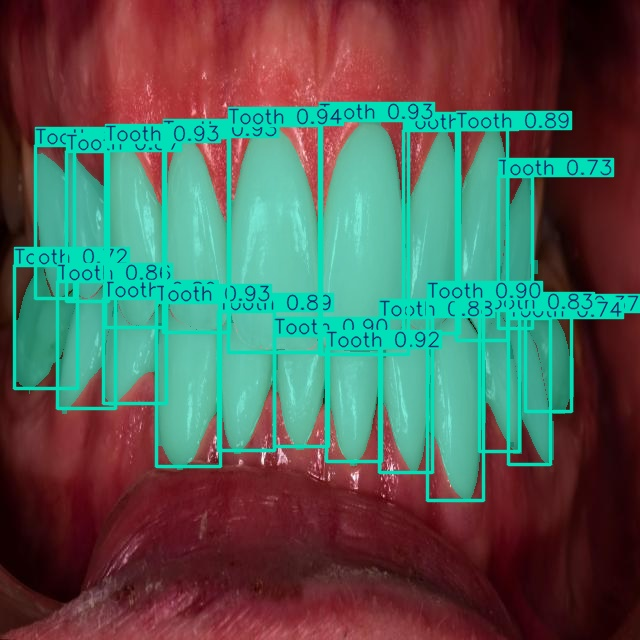

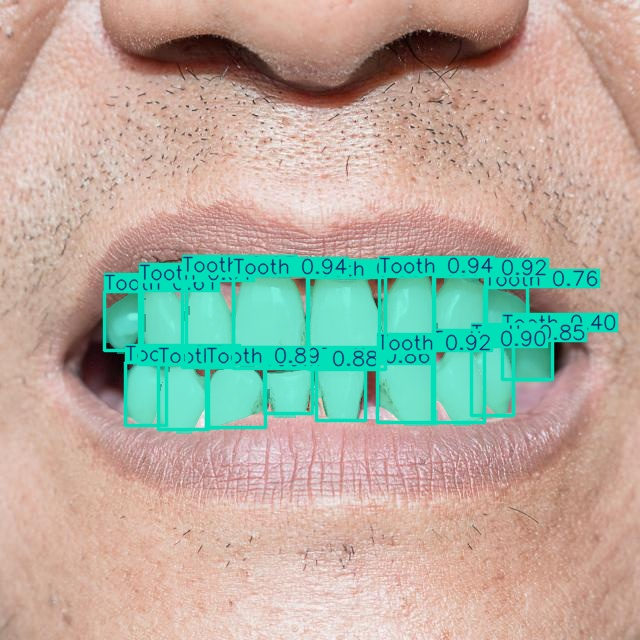

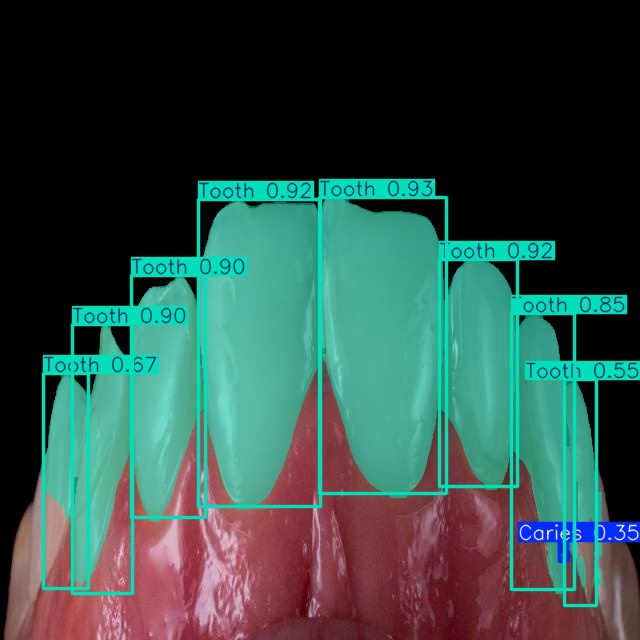

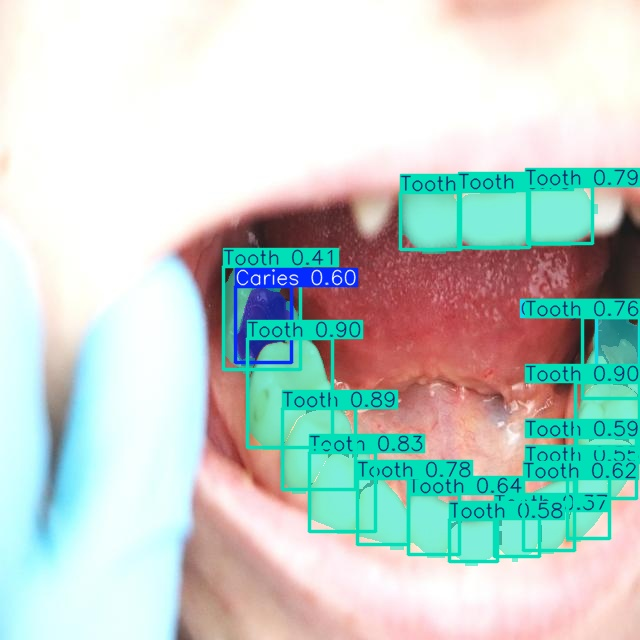

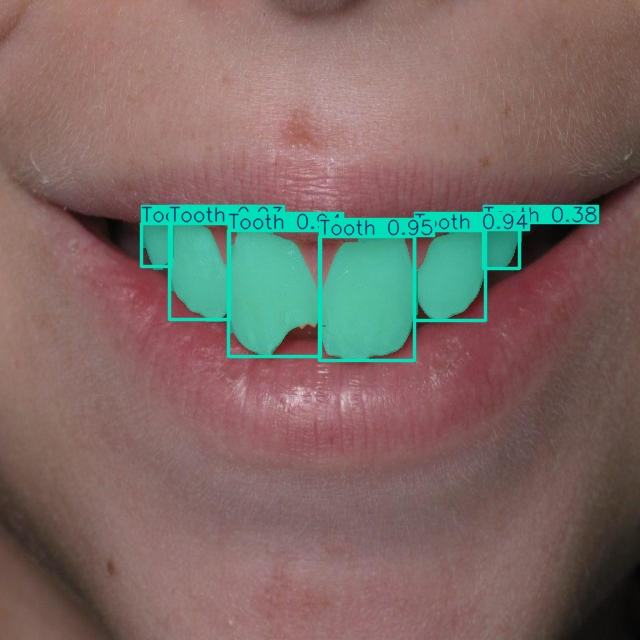

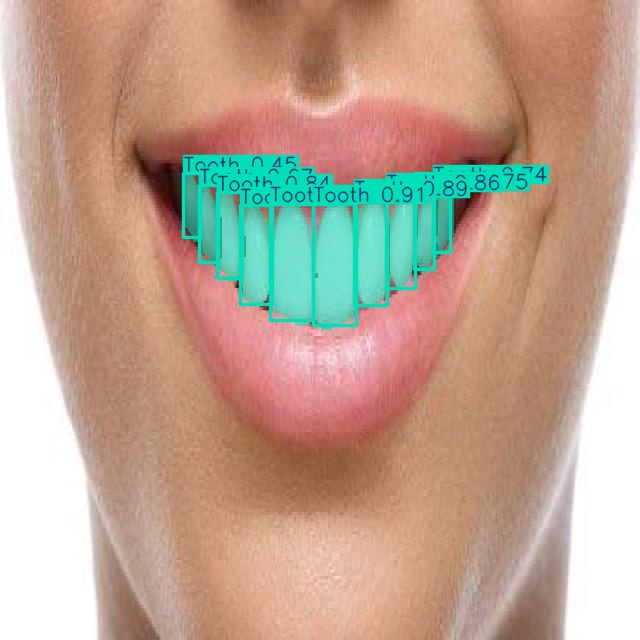

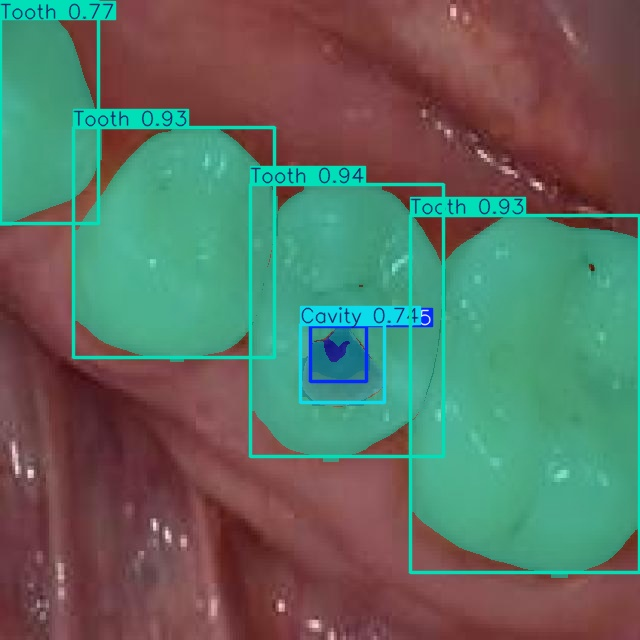

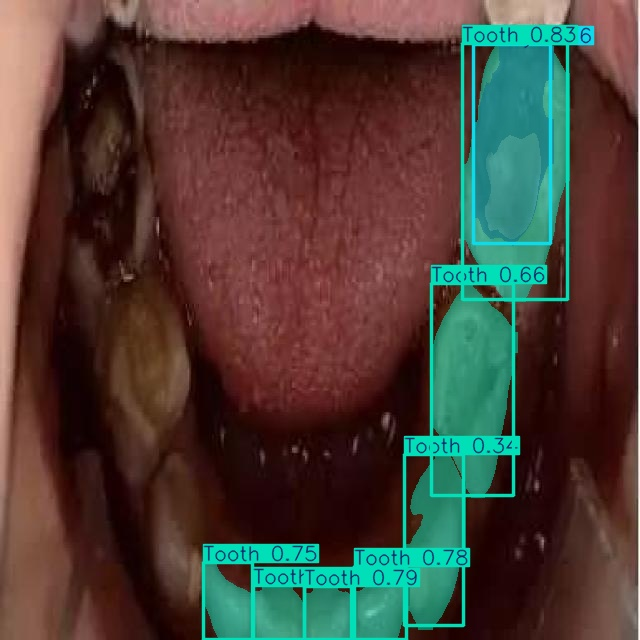

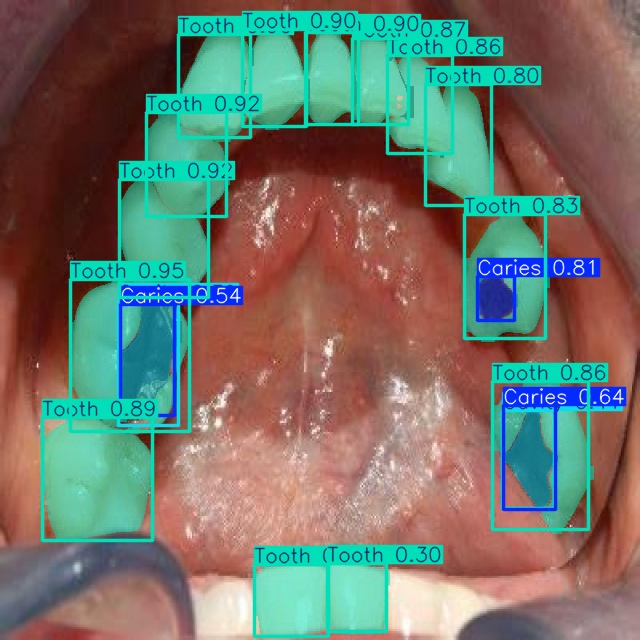

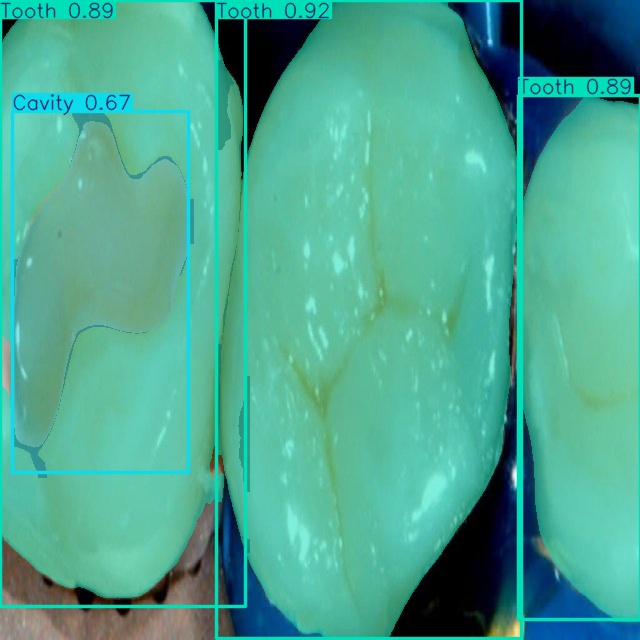

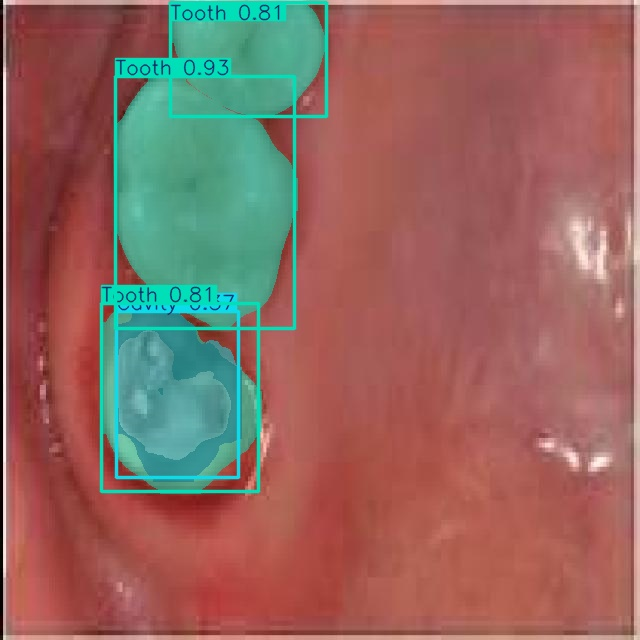

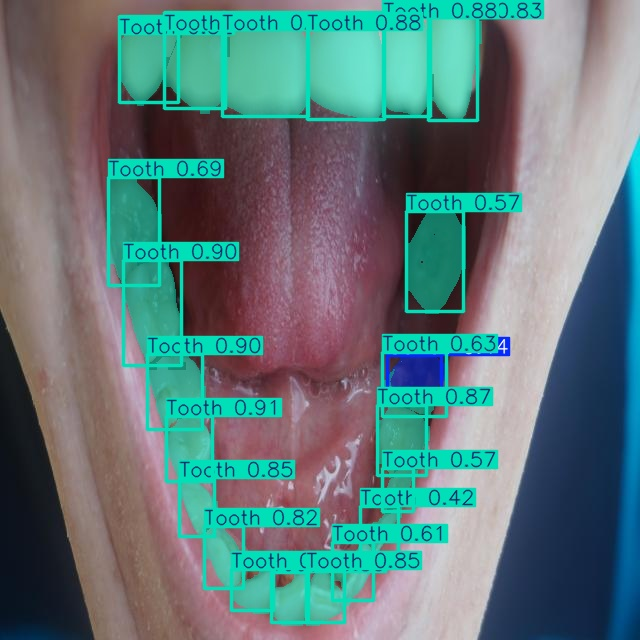

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:50]:
      display(Image(filename=image_path, height=600))
      print("\n")

Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

In [ ]:
# Run inference on your model on a persistant, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image).json()
pred

running inference on 3445_jpg.rf.e91bf79d72e3bfbebe114b67b82d3070.jpg


{'predictions': [{'x': 304.5,
   'y': 260.0,
   'width': 237.0,
   'height': 434.0,
   'confidence': 0.9535821080207825,
   'class': 'Tooth',
   'points': [{'x': 304.0, 'y': 43.0},
    {'x': 304.0, 'y': 44.0},
    {'x': 301.0, 'y': 47.0},
    {'x': 300.0, 'y': 47.0},
    {'x': 299.0, 'y': 48.0},
    {'x': 298.0, 'y': 48.0},
    {'x': 295.0, 'y': 51.0},
    {'x': 294.0, 'y': 51.0},
    {'x': 293.0, 'y': 52.0},
    {'x': 292.0, 'y': 52.0},
    {'x': 291.0, 'y': 53.0},
    {'x': 290.0, 'y': 53.0},
    {'x': 288.0, 'y': 55.0},
    {'x': 287.0, 'y': 55.0},
    {'x': 286.0, 'y': 56.0},
    {'x': 285.0, 'y': 56.0},
    {'x': 283.0, 'y': 58.0},
    {'x': 282.0, 'y': 58.0},
    {'x': 280.0, 'y': 60.0},
    {'x': 278.0, 'y': 60.0},
    {'x': 275.0, 'y': 63.0},
    {'x': 274.0, 'y': 63.0},
    {'x': 273.0, 'y': 64.0},
    {'x': 272.0, 'y': 64.0},
    {'x': 271.0, 'y': 65.0},
    {'x': 270.0, 'y': 65.0},
    {'x': 267.0, 'y': 68.0},
    {'x': 266.0, 'y': 68.0},
    {'x': 265.0, 'y': 69.0},
    {'x